In [1]:
import tensorflow as tf
from tensorflow import keras

2023-01-24 15:08:58.683128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__


'2.11.0'

In [3]:
keras.__version__

'2.11.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train_full.shape, X_train_full.dtype)

(60000, 28, 28) uint8


In [6]:
X_valid, X_train, X_test = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0, X_test / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ['T-shirt/top','Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag','Ankle boot']

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))


2023-01-24 15:09:22.205720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
weights, biases = hidden1.get_weights()
print(weights.shape, biases.shape)

(784, 300) (300,)


In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7356 - accuracy: 0.7586 - val_loss: 0.5204 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4902 - accuracy: 0.8303 - val_loss: 0.4521 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4446 - accuracy: 0.8453 - val_loss: 0.4330 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4190 - accuracy: 0.8545 - val_loss: 0.4271 - val_accuracy: 0.8502
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3989 - accuracy: 0.8603 - val_loss: 0.4286 - val_accuracy: 0.8516
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.8648 - val_loss: 0.3776 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3696 - accuracy: 0.8690 - val_loss: 0.3643 - val_accuracy:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



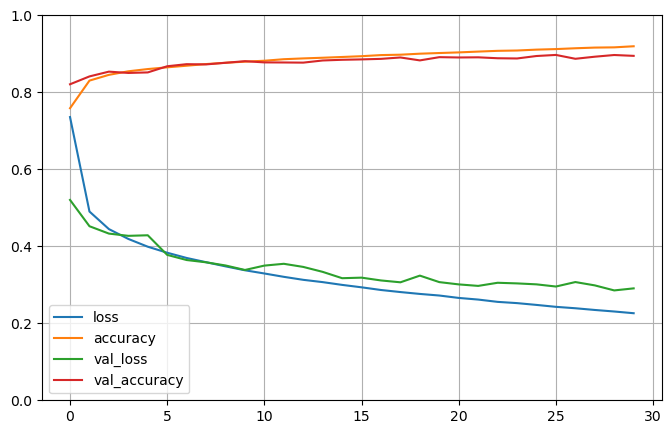

In [17]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8848


[0.32622092962265015, 0.8848000168800354]

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 235ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = np.argmax(y_proba, axis = 1)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)